In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
df = pd.read_csv("dibetise.csv")


In [12]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [15]:
print(df.columns)

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')


In [16]:
df.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]


In [17]:
import numpy as np

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())


In [18]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [20]:
print(f"Accuracy: {accuracy * 100:.2f}%\n")



Accuracy: 79.87%

Confusion Matrix:


In [21]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[81 16]
 [15 42]]


In [22]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        97
           1       0.72      0.74      0.73        57

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



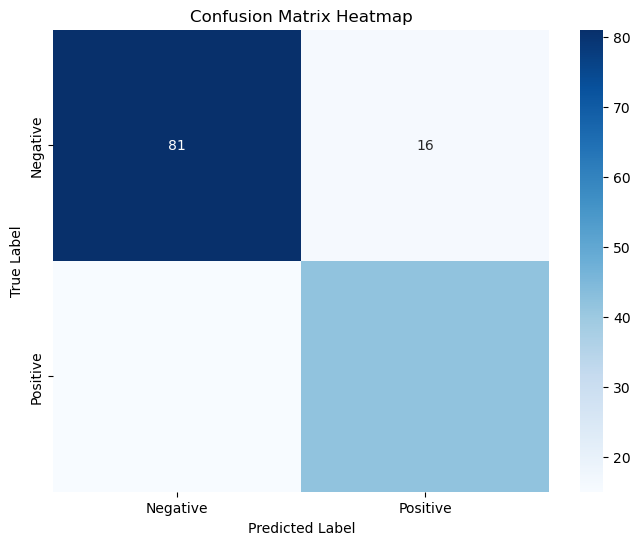

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['Negative', 'Positive']  # Adjust based on your dataset

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
